# Econometric Data Science ( HS 421 )
### *Instructor* : Dr. Sunil Paul

## End Semester assessment: **Question 2**

### Authors ( Group 12 )
- Sanjay Marreddi
- Rishabh Tripathi
- Nishant Kumar
- Yash Narnaware


### **1. Build a predictive model based on Box Jenkins methodology using the monthly data from 1932:M1 to 2002:M12, on excessive returns of CRSP value-weighted index. The monthly excess return is what you earn, in percentage terms by purchasing a stock at the end of the previous month and selling it at the end of this month, minus what you would have earned had you purchased a safe asset (a U.S. Treasury bill in this case). The return on the stock includes the capital gain (or loss) from the change in price plus any dividends you receive during the month. The data was used in the journal article titled “Efficient Tests of Stock Return Predictability”, Journal of Financial Economics, 2006. Clearly explain how you choose the model using the autocorrelation, partial autocorrelation.**



Building a predictive model based on **Box Jenkins methodology** involves Multi step model building strategy. It includes :
1. Model Specification (Identification)
2. Estimation
3. Diagnostic checking
4. Forecasting

#### 1. **Model Specification**

**1.1) Lets start with plotting the given time series to check if we can find some insights.**


In [ ]:
# Importing the required libraries
import numpy as np
import pandas as pd  
import seaborn as sns 
import plotly.express as px
import statsmodels.api as sm
import matplotlib.pyplot as plt 
import statsmodels.formula.api as smf
import statsmodels.regression.quantile_regression as Q_reg

!pip install pmdarima
from sklearn import metrics
from statsmodels.compat import lzip
from pmdarima.arima import auto_arima
from pmdarima.arima.utils import ndiffs
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import adfuller
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
from statsmodels.stats.diagnostic import het_white, het_breuschpagan

%matplotlib inline


In [ ]:
# Reading the provided file
Input_df = pd.read_excel("Q2.xlsx")
Input_df.head()

,time,Month,ExReturn
0,1931,1,5.964958
1,1931,2,10.305305
2,1931,3,-6.840831
3,1931,4,-10.448065
4,1931,5,-14.358077


In [ ]:
# Examining the data
Input_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864 entries, 0 to 863
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   time      864 non-null    int64  
 1   Month     864 non-null    int64  
 2   ExReturn  864 non-null    float64
dtypes: float64(1), int64(2)
memory usage: 20.4 KB


In [ ]:
# Analysing the data
Input_df.describe()

,time,Month,ExReturn
count,864.000000,864.000000,864.000000
mean,1966.500000,6.500000,0.502132
std,20.794642,3.454052,5.377249
min,1931.000000,1.000000,-34.258389
25%,1948.750000,3.750000,-2.103179
50%,1966.500000,6.500000,0.895111
75%,1984.250000,9.250000,3.586565
max,2002.000000,12.000000,32.307310


In [ ]:
# Creating a separate coulmn to account for both year and month.
Input_df['time_combined'] =  Input_df["time"]
for i in range(864):
  Input_df['time_combined'][i] = str(Input_df["time"][i]) + "-" +  str(Input_df["Month"][i])

# Plotting the Time Series.
fig = px.line(Input_df, x='time_combined', y="ExReturn")
fig.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



**The following inferences can be drawn from the above Time Series plot:**

- The series seems to be persistent and There are no visible breaks in mean of the series.
- The sequence seems to be a covariance stationary process upon looking the above graph.

**1.2) Now, Let us see if the given Time Series is COVARIANCE STATIONARY or not by performing ADF Testing.**

**ADF Testing**\
We'll use the Augumented Dickey Fuller (ADF) test to check if the price series is stationary.

 So, if the p-value of the test is less than the significance level (0.05) then we can reject the null hypothesis and infer that the time series is indeed stationary. else situation it is non stationary. 



In [ ]:
# Check if price series is stationary

result = adfuller(Input_df.ExReturn.dropna())
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")

ADF Statistic: -8.000838207693812
p-value: 2.336368822902083e-12


So, in our case, the p-value < 0.05, **We can say that the given Time Series is Stationary.** So we can use our Box Jenkins methodology without any issues.
Also, we need **not Transform the data**, since the assumption of
covariance stationarity is a reasonable one.

**1.3) Now, Let us try to find the Order of the Model using ACF and PACF of the given sample data of Time Series.**

First, Let's have a look at the ACF and PACF of the sample Time Series

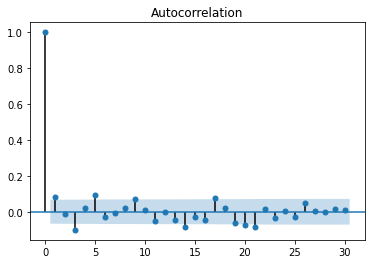

In [ ]:
# Plotting the ACF of the Time Series
plot_acf(Input_df.ExReturn)
plt.show()

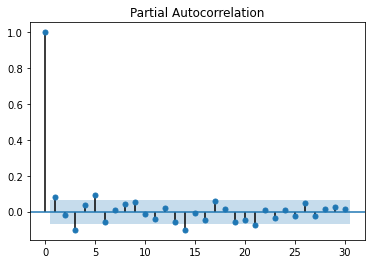

In [ ]:
# Plotting the PACF of the Time Series
plot_pacf(Input_df.ExReturn)
plt.show()

From the above two plots, The following conclusions can be drawn:

- The Auto Correlation Function (ACF) and Partial Auto Correlation Function ( PACF ) converge to zero quickly. So we don't have to worry about the time-varying mean.
-  We know that the theoretical  Auto Correlation Function (ACF) of a pure MA(q) process cuts off to zero at lag q. But since the Plot of the the plot of the Auto Correlation Function (ACF) don't exhibit such a behavior, possibility of pure MA(q) process can be eliminated easily.

-  We also know that theoretical  Auto Correlation Function (ACF) of an AR(1) process/model decays geometrically. But since above plots does not follow such pattern, this possibility can also be eliminated.

- **Actually, In this way using the exact values of ACF, PACF of the Sample and Q-stats, P-value and also examining ACF, PACF of the residuals, one can do Trial and Error Method & reach a better model to fit the time series.** 

- **But we also have a Library that does this computation for us & directly gives us the optimal  values of p, q the orders of AR & MA process respectively to build a model for the given Time Series.**



##### ARIMA : 
- Autoregressive integrated moving average (ARIMA) models were popularised by Box and Jenkins (1970).
- ARIMA (AutoRegressive Integrated Moving Average) is a forecasting algorithm which based on the idea that the information in the past values of the time series can alone be used to predict the future values.
- ARIMA models explain a time series based on its own past values, basically its own lags and the lagged forecast errors.
- An ARIMA model describes a univariate time series as a combination of autoregressive (AR) and moving average (MA) lags which capture the autocorrelation within the time series.


An ARIMA model is characterized by 3 terms (p, d, q):

- p is the order of the **Auto Regressive (AR) term**. It refers to the number of lags to be used as predictors. 


- d is the number of differencing required to make the time series stationary

- q is the order of the **Moving Average (MA) term**. It refers to the number of lagged forecast errors that should go into the ARIMA Model.

As we see in the parameters required by the model, any stationary time series can be modeled with ARIMA models.

Note : We need not to find the order of differencing since we already tested the stationarity of Test Series. The d value is **0** if time series is stationary.Below is an alternate way for getting value of d directly if one doesnot know to interpret from stationarity.

In [ ]:
# Finding the optimal value of d
d_value = ndiffs(Input_df.ExReturn, test="adf")
print(d_value)

0


In [ ]:
# To automatically discover the optimal order for an ARIMA model.
model = auto_arima(
    Input_df.ExReturn,  # The time-series to which to fit the ARIMA estimator.
    start_p=1,          # The starting value of p, the order of the auto-regressive (“AR”) model.
    start_q=1,          # The starting value of q, the order of the moving-average (“MA”) model.
    test="adf",         # Type of unit root test to use in order to detect stationarity.
    max_p= 6,           # The maximum value of p, inclusive. 
    max_q= 6,           # The maximum value of q, inclusive. 
    m=1,                # frequency of series.
    seasonal=False,     # Fitting a Non seasonal ARMA process.
    trace=True,         # To print status on the fits.
    stepwise=False,     # Whether to use the stepwise algorithm outlined in Hyndman and Khandakar to identify the optimal model parameters.
)

 ARIMA(0,0,0)(0,0,0)[0]             : AIC=5367.237, Time=0.07 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=5362.231, Time=0.08 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=5364.011, Time=0.12 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=5356.776, Time=0.15 sec
 ARIMA(0,0,4)(0,0,0)[0]             : AIC=5358.660, Time=0.22 sec
 ARIMA(0,0,5)(0,0,0)[0]             : AIC=5350.652, Time=0.23 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=5362.190, Time=0.05 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=5364.164, Time=0.12 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=5364.018, Time=0.25 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=5358.741, Time=0.32 sec
 ARIMA(1,0,4)(0,0,0)[0]             : AIC=5356.286, Time=0.50 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=5364.109, Time=0.09 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=5365.381, Time=0.31 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=5348.834, Time=0.58 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=5349.500, Time=0.40 sec
 ARIMA(3,0


- Notice that, the usual steps of finding the order of the model and Principal of parsimony included in the above where the optimal values are found automatically by the algorithm.
- As seen from the above results, The Optimal Model has the values of p, d, q are 2,0, 2 respectively. 
- **Hence we can say that ARMA(2,2) is a better model that can be used to analyse, forecast the given Time Series.**

#### 2. **Estimation**

**Fitting the ARIMA model which represents ARMA(2,2)**

In [ ]:
# Let us split the data into training & testing data.
n = int(len( Input_df) * 0.8)
train =  Input_df.ExReturn[:n]
test =  Input_df.ExReturn[n:]

# ARIMA Model
model = ARIMA(train, order=(2, 0, 2))
result = model.fit(disp=0)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning:


statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)




In [ ]:
print(result.summary())

                              ARMA Model Results                              
Dep. Variable:               ExReturn   No. Observations:                  691
Model:                     ARMA(2, 2)   Log Likelihood               -2166.480
Method:                       css-mle   S.D. of innovations              5.563
Date:                Tue, 18 May 2021   AIC                           4344.960
Time:                        15:32:13   BIC                           4372.189
Sample:                             0   HQIC                          4355.492
                                                                              
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.5132      0.233      2.199      0.028       0.056       0.971
ar.L1.ExReturn    -0.2329      0.102     -2.282      0.023      -0.433      -0.033
ar.L2.ExReturn    -0.7401      0.080

- The model summary reveals a bunch of information. The table in the middle is the coefficients table where the values under `coef` are the weights of  respective terms.

- Notice here that coefficients of the all the terms : AR1, AE2, MA1, MA2 are having their P-Value (P-Value in ‘P>|z|’ column) to be less than 0.05 and hence they are significant.

#### 3. **Diagnostic Checking**

- Now lets examine the residuals of the fitted model by Plot the residuals and check whether they are inturn WHITE NOISE processes.

- We will also examine the autocorrelation properties of residual by checking
its SACF and PACF Examine Q statistics and LM statistics

**3.1) Let’s plot the residuals to ensure there are no patterns (that is, look for constant mean and variance)**

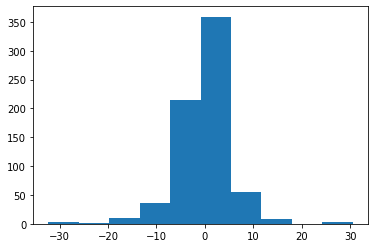

In [ ]:
# Plotting the histogram of residuals
plt.hist(result.resid)
plt.show() 

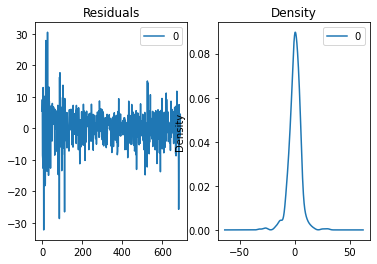

<Figure size 360x360 with 0 Axes>

In [ ]:
# Plotting the residual errors
residuals = pd.DataFrame(result.resid)
fig, ax = plt.subplots(1,2)
plt.figure(figsize=(5, 5))
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

- **From the above plots, The residual errors seem fine with near zero mean and uniform variance which is an indication that residuals are in accordance with WhiteNoise Process.**

**3.2) Now Let's Examine the autocorrelation properties of residual by checking
its ACF and PACF.** 

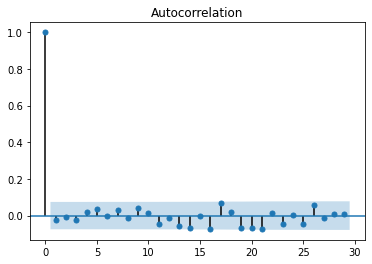

In [ ]:
# Plotting the ACF of the Residuals
plot_acf(result.resid)
plt.show()

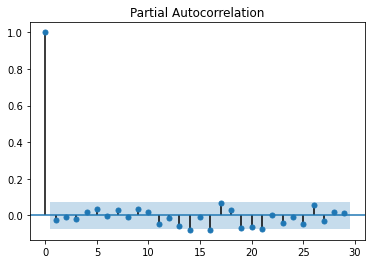

In [ ]:
# Plotting the PACF of the Residuals
plot_pacf(result.resid)
plt.show()

From the above two plots of ACF & PACF, The following conclusions can be drawn:

- All of the estimated coefficients are of high quality i.e. all the coefficients are statistical significant.
- All autocorrelations are also of very less magnitude.
- This is also an indication of distribution of residuals being a **White Noise Process**.

**3.3) Now Let's perform Ljung-Box test of autocorrelation in residuals.** 

In [ ]:
# test of autocorrelation in residuals.
sm.stats.acorr_ljungbox(result.resid, lags=list(range(1,30,1)), return_df=True)

,lb_stat,lb_pvalue
1,0.474427,0.490958
2,0.523910,0.769546
3,0.840628,0.839727
4,1.095636,0.894964
5,1.925136,0.859404
6,1.940718,0.925069
7,2.574831,0.921358
8,2.675273,0.953056
9,3.740334,0.927657
10,3.902851,0.951623




From the above results, 
- We can see that all P-Values are > 0.05, So We fail to reject the NULL Hypothesis.
- It means all the correlations are Zero and hence the residuals follow WHITE NOISE PROCESS.

**From all the diagnostic checking tests, We can conclude that distribution of the residuals do follow the White Noise process and hence our ARMA(2,2) model is a good fit for the given Time Series.**

#### 4. **Forecasting**

##### Lets compare Actual verses Forecasting for Fitted data.

In [ ]:
# Here we are Forecasting next 173 value and then we index those many quantities in test[: step]
step = 173
fc, se, conf = result.forecast(step, alpha=0.05)  # 95% conf

In [ ]:
# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

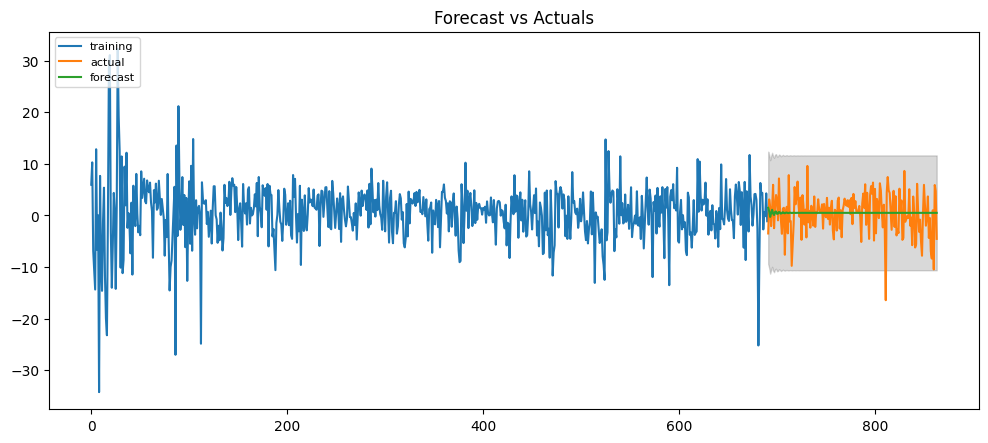

In [ ]:
# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

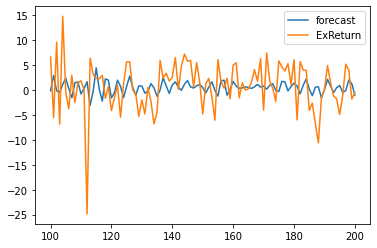

In [ ]:
# Actual vs Fitted
result.plot_predict(
    start =100,
    end   = 200,
    dynamic=False,
);

 ##### Accuracy Metrics for Time Series Forecast

In [ ]:
# Accuracy metrics
def forecast_accuracy_calculator(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr

    return({'mape':mape, 'mae': mae, 
            'mpe': mpe, 'corr':corr})

arma_2_2_accuracy = forecast_accuracy_calculator(fc, test.values)


### **2. In addition, estimate and AR (2) and AR (4) models and interpret the results. Compare the forecasting accuracy of your model with these models. Does you model support the theory of efficient capital markets, which holds that excess returns should be unpredictable because stock prices already embody all currently available information.**

#### Estimating the AR(2) model

Since we know an ARIMA model is characterized by 3 terms (p, d, q):

- p is the order of the Auto Regressive (AR) term. It refers to the number of lags to be used as predictors.
- d is the number of differencing required to make the time series stationary

- q is the order of the Moving Average (MA) term. It refers to the number of lagged forecast errors that should go into the ARIMA Model.

- **To estimate AR(2) Model , the values of (p,d,q) are (2,0,0) respectively**

In [ ]:
# Let us split the data into training & testing data.
n = int(len( Input_df) * 0.8)
train_ar2 =  Input_df.ExReturn[:n]
test_ar2 =  Input_df.ExReturn[n:]

# AR(2) Model
model_ar2 = ARIMA(train_ar2, order=(2, 0, 0))
result_ar2 = model_ar2.fit(disp=0)
print(result_ar2.summary())

                              ARMA Model Results                              
Dep. Variable:               ExReturn   No. Observations:                  691
Model:                     ARMA(2, 0)   Log Likelihood               -2177.924
Method:                       css-mle   S.D. of innovations              5.657
Date:                Tue, 18 May 2021   AIC                           4363.847
Time:                        15:32:15   BIC                           4382.000
Sample:                             0   HQIC                          4370.868
                                                                              
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.5147      0.235      2.194      0.028       0.055       0.975
ar.L1.ExReturn     0.0971      0.038      2.552      0.011       0.023       0.172
ar.L2.ExReturn    -0.0141      0.038

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning:


statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)




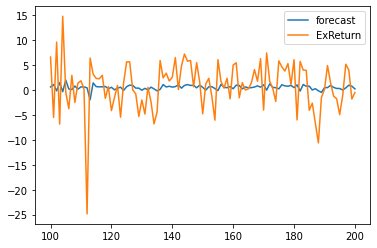

In [ ]:
# Actual vs Fitted
result_ar2.plot_predict(
    start =100,
    end   = 200,
    dynamic=False,
);

In [ ]:
# Here we are Forecasting next 173 value and then we index those many quantities in test[: step]
step = 173
fc_ar2, se_ar2, conf_ar2 = result_ar2.forecast(step, alpha=0.05)  # 95% conf

# Calculating the accuracy
ar_2_accuracy = forecast_accuracy_calculator(fc_ar2, test.values)

#### Estimating the AR(4) model

- **To estimate AR(4) Model , the values of (p,d,q) are (4,0,0) respectively**

In [ ]:
# Let us split the data into training & testing data.
n = int(len( Input_df) * 0.8)
train_ar4 =  Input_df.ExReturn[:n]
test_ar4 =  Input_df.ExReturn[n:]

# AR(4) Model
model_ar4 = ARIMA(train_ar4, order=(2, 0, 0))
result_ar4 = model_ar2.fit(disp=0)
print(result_ar4.summary())

                              ARMA Model Results                              
Dep. Variable:               ExReturn   No. Observations:                  691
Model:                     ARMA(2, 0)   Log Likelihood               -2177.924
Method:                       css-mle   S.D. of innovations              5.657
Date:                Tue, 18 May 2021   AIC                           4363.847
Time:                        15:32:15   BIC                           4382.000
Sample:                             0   HQIC                          4370.868
                                                                              
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.5147      0.235      2.194      0.028       0.055       0.975
ar.L1.ExReturn     0.0971      0.038      2.552      0.011       0.023       0.172
ar.L2.ExReturn    -0.0141      0.038

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning:


statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)




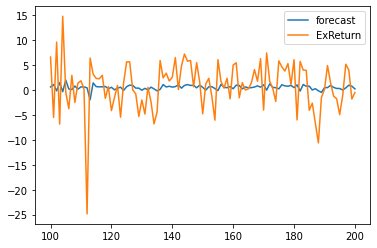

In [ ]:
# Actual vs Fitted
result_ar4.plot_predict(
    start =100,
    end   = 200,
    dynamic=False,
);

In [ ]:
# Here we are Forecasting next 173 value and then we index those many quantities in test[: step]
step = 173
fc_ar4, se_ar4, conf_ar4 = result_ar4.forecast(step, alpha=0.05)  # 95% conf

# Calculating the accuracy
ar_4_accuracy = forecast_accuracy_calculator(fc_ar4, test.values)

#### Comparing the forecasting accuracy

In [ ]:
column_names = list( ar_4_accuracy.keys())
data = [arma_2_2_accuracy.values(), ar_2_accuracy.values(),ar_4_accuracy.values()]

# Create the pandas DataFrame 
accuracy_df = pd.DataFrame(data, columns = column_names) 
accuracy_df.index = ['arma_2_2', 'ar_2', 'ar_4']
accuracy_df

,mape,mae,mpe,corr
arma_2_2,1.010976,3.011082,-0.971132,0.008684
ar_2,1.014273,3.012754,-0.974159,0.077866
ar_4,1.014273,3.012754,-0.974159,0.077866


**Based on the above accuracy metrics results, which are  Mean Absolute Percentage Error (MAPE), Mean Absolute Error (MAE), Mean Percentage Error (MPE), Correlation between the Actual and the Forecast (corr), we can state that forecasting accuracy of our model ARMA(2,2) is more than that of AR(2) and AR(4).**

**Yes! Our model supports the theory of efficient capital markets**, which holds that excess returns should be 
unpredictable because stock prices already embody all currently available information. This can be interpreted by observing the above graph related to our model `ARMA(2,2)`which shows the **Actual Value vs Forecasted Value**. The actual Values are more deviating than the forecasted value, proving theory of efficient capital markets.
